# The Topics of the *nlp4twitter* Course

We will adopt a data science approach to this course in order to find which NLP techniques to study. We will "process" all articles in the [ACM DL](http://dl.acm.org/) (expanded to all records) with the word `twitter` **in the title** (we had to stop somewhere. We could have searched for `twitter` everywhere, ~2.2K results. We did, however, extend the search to the whole database, not only the ACM Full Text DB). 

Specifically, we ran the following query:
```
Search Run Date: 2016-04-15 at 12:46:23 PM EDT

Query Syntax:
"query": { acmdlTitle:(twitter) } 

"filter": 
{owners.owner=GUIDE}
```
which resulted in 1,307 articles matching it (as of the date above, could be more by now!).

Now, ACM DL, as far as I know, doesn't allow you to download > ~1000, I did a trick: I sorted by number of citations *and* provided two ranges: the first was from 2006-2014 (998 records), and the second was from 2015-2016 (309 records), for both `.csv` and `bib` files, which I will use later.

This produced the following 4 files:

Notice that *each file* is sorted by number of citations independently, but split on publication data. This means that the concatenation of them will not give you a complete citation-sorted file. For now, we are only be interested in the `csv` files, because they're easier to deal with in Notebooks.

In [2]:
import pandas as pd

In [5]:
acm_2006_2014 = pd.read_csv(
    "../bib/data/acm_twitter_2006-2014_citation.csv")
acm_2015_2016 = pd.read_csv(
    "../bib/data/acm_twitter_2015-2016_citation.csv")

Let's first join the two data frames:

In [6]:
dfs = [acm_2006_2014, acm_2015_2016]
acm = pd.concat(dfs)

But we don't want anything that is not a paper (e.g., we don't want books, or PhD thesis) or really care about anything but the titles (maybe), the years, and particularly, the keywords. We also get rid of nulls, which pushes us to even less records, but fine.

In [7]:
acm = acm[acm['type'].str.contains("article")]
acm = acm[['keywords','title','year']]
acm = acm[acm['keywords'].notnull()]
acm = acm[acm['title'].notnull()]
len(acm)

905

The number 905 is still a gargantuan number of papers to analyze! The objective here is to get a sense of the methods used in those papers. But first, let's get rid of some of the crud. Here we split all keywords into "phrases" using "," as the splitter and convert the Pandas `Series` object into a list of lists. We then convert that list of lists into a single list whose phrases are stripped of formatting and the space character and lower-cased, and finally we get rid of duplicates:

In [8]:
pd.set_option('display.max_colwidth', -1)
acm.head()

,keywords,title,year
0,"Twitter, degree of separation, homophily, influential, information diffusion, online social network, pagerank, reciprocity, retweet","What is Twitter, a Social Network or a News Media?",2010
1,"Twitter, earthquake, event detection, location estimation, social sensor",Earthquake Shakes Twitter Users: Real-time Event Detection by Social Sensors,2010
2,"microblogging, social media, social network analysis, user intent",Why We Twitter: Understanding Microblogging Usage and Communities,2007
3,"influential, pagerank, twitter",TwitterRank: Finding Topic-sensitive Influential Twitterers,2010
4,"communication networks, diffusion, influence, twitter, word of mouth marketing",Everyone's an Influencer: Quantifying Influence on Twitter,2011


In [ ]:
acm.to_csv('data/bib/acm.csv')

In [9]:
keywords = acm['keywords'].str.split(',').tolist()
keywords = [item.lower().strip() 
            for sublist in keywords for item in sublist]
keywords=set(keywords)
len(keywords)

1939

The above process leaves "only" 1951 phrases that are unique keywords to those papers!

In [ ]:
%matplotlib inline
from os import path
from wordcloud import WordCloud

from scipy.misc import imread

twitter_mask = imread

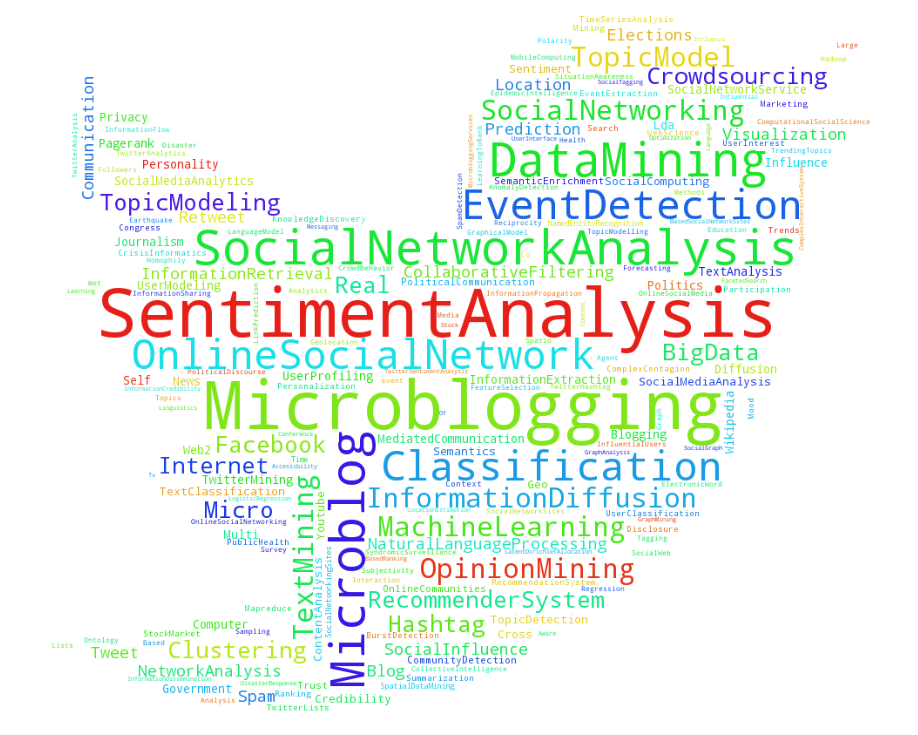

In [19]:
%matplotlib inline
from os import path
from wordcloud import WordCloud

from scipy.misc import imread

twitter_mask = imread('twitter_mask.png', flatten=True)

# Read the whole text.
text = open('words_column.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
#plt.imshow(wordcloud)
#plt.axis("off")

STOP = set(["twitter","socialmedia","socialnetworks","socialnetwork"])
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(width=1600, height=800, stopwords=STOP, background_color='white',  mask=twitter_mask).generate(text)

plt.figure()
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('./my_twitter_wordcloud.png', dpi=300)